# Topic Modeling Gensim quick documentation

URL = https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html

In [1]:
import pprint
document = "Human machine interface for lab abc computer applications"
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]
# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)


[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [2]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...>


### Vectors

To infer the latent structure in our corpus we need a way to represent documents that we can manipulate mathematically. One approach is to represent each document as a vector of features. For example, a single feature may be thought of as a question-answer pair:

How many times does the word splonge appear in the document? Zero.

How many paragraphs does the document consist of? Two.

How many fonts does the document use? Five.

In [3]:
pprint.pprint(dictionary.token2id)

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


In [6]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(0, 1), (1, 1)]


In [11]:
from gensim import models


# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "system minors".lower().split()
print(tfidf[dictionary.doc2bow(words)])

NameError: name 'bow_corpus' is not defined

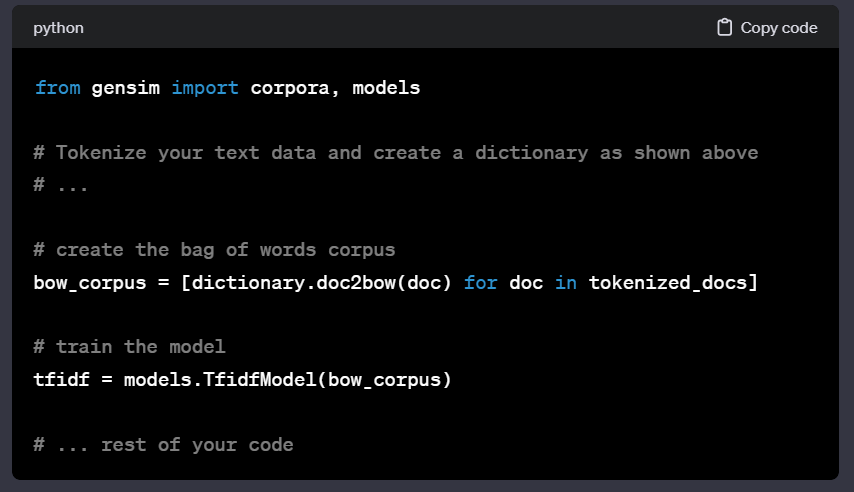

In [9]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

NameError: name 'tfidf' is not defined

In [10]:
query_document = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_document)
sims = index[tfidf[query_bow]]
print(list(enumerate(sims)))

NameError: name 'index' is not defined